Q1. Solve normally,65% of all students who appear for c-dac entrance test clear it. 
50 students from coaching class hace appeared for c-dac march 2024 entrance test what is the probability that none of them will clear it. 
What is proability that more than 40 will clear it ? 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import binom

In [2]:
n = 50 #no of student from class
p = 0.65 #probability of passing test

#1) none will clear it
P_X_0 = binom.pmf(0, n, p)
print(f"Probability that none of them will clear the test: {P_X_0:.25f}")
#2) proability that more than 40 will clear it
p_0 = 1 - binom.cdf(4,n,p)
print(f"{p_0:.4f}")

Probability that none of them will clear the test: 0.0000000000000000000000160
1.0000


Q2. Hospital records show that of patients suffering from specific disease,75% die of it what is the probability 
that of six randomly selected patients,four will recover

In [3]:
n = 6 #randomly selected 
p = 0.25 # prbability of surviving
k = 4

p_4 = binom.pmf(k,n,p)
print(f"Probability that four will recover: {p_4:.2f}")

Probability that four will recover: 0.03


In [4]:
#Tips Data finding the probability of getting tip when tip is 15% of bill

tip_df = pd.read_csv('../dataset/tips.csv')
tip_df.columns

Index(['total_bill', 'tip', 'gender', 'smoker', 'day', 'time', 'size',
       'price_per_person', 'Payer Name', 'CC Number', 'Payment ID'],
      dtype='object')

In [5]:
#checking if tip 15% of bill return success as 1 else failure as 0
def classify_tip(row):
    total_bill = row['total_bill']
    tip = row['tip']
    if tip / total_bill >= 0.15:
        return 1
    else:
        return 0

In [6]:
tip_df['Binary_outcome'] = tip_df.apply(classify_tip,axis=1)

In [7]:
#probability of getting success tip / total_bill > 0.15
n = len(tip_df)
k = tip_df['Binary_outcome'].sum()
p = k /n
print(p)

0.5573770491803278


In [8]:
#Define number of trials for binomial distribution
trials = 100

#binomial probability of exactly k success in trials
hypothetical_k  = 50
probability = binom.pmf(hypothetical_k,trials,p)


In [9]:
#Exact binomial probabilty of 60% (60 out of 100)
exact_60 = binom.pmf(60,trials,p)
#Exact binomial probabilty of 65% (65 out of 100)
exact_65 = binom.pmf(65,trials,p)


In [10]:
cummulative_prob = binom.cdf(60,trials,p)

In [11]:
print(f"Total Trials(n) : {n}")
print(f"number of successes (k): {k}")
print(f"probability of successes (p): {p:.4f}")
print(f"binomial probability of exactly {hypothetical_k} successes in {trials} trials : {probability:.4f}")
print(f"Exactly binomial probability at 60% success(60 out of {trials}) : {exact_60:.4f}")
print(f"cummulative  probability for 60% or fever success in {trials} : {cummulative_prob:.4f}")
print(f"Exact binomial probability at 65% success(65 out of {trials}) : {exact_65:.4f}")

Total Trials(n) : 244
number of successes (k): 136
probability of successes (p): 0.5574
binomial probability of exactly 50 successes in 100 trials : 0.0410
Exactly binomial probability at 60% success(60 out of 100) : 0.0560
cummulative  probability for 60% or fever success in 100 : 0.8311
Exact binomial probability at 65% success(65 out of 100) : 0.0141


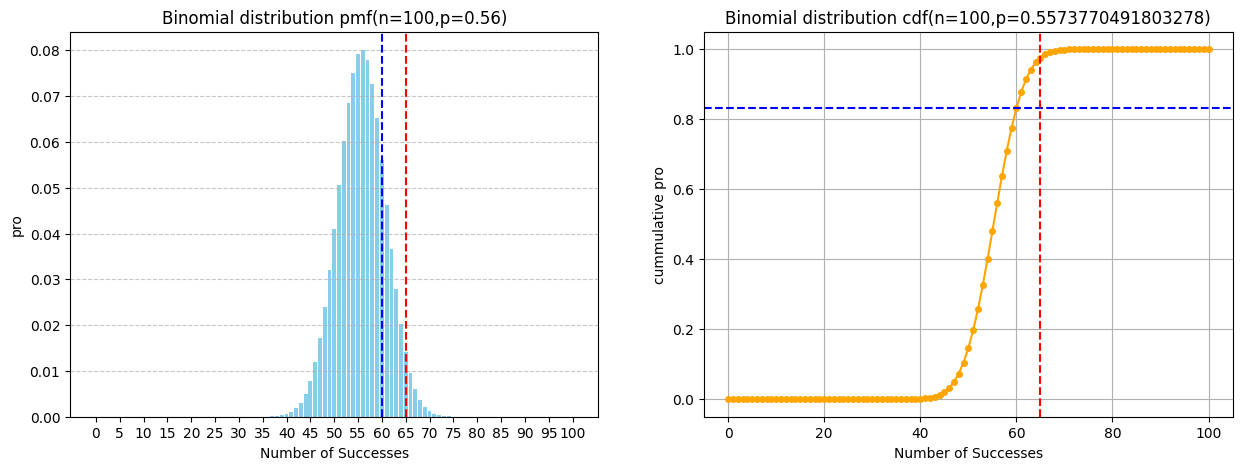

In [12]:
#generate no from 0 to trials+1
x = np.arange(0,trials+1)
pmf_value = binom.pmf(x,trials,p)

#calculate cdf 
cdf_value = binom.cdf(x,trials,p)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.bar(x,pmf_value,color='skyblue',alpha=1)
plt.title(f"Binomial distribution pmf(n={trials},p={p:.2f})")
plt.xticks(np.arange(0,trials+1,5))
plt.xlabel('Number of Successes')
plt.ylabel('pro')
plt.grid(axis='y',alpha=0.7,linestyle = '--')
plt.axvline(x=60,linestyle='--',color='blue',label='60 successes')
plt.axvline(x=65,linestyle='--',color='red',label='65 successes')
plt.legend



plt.subplot(1,2,2)
plt.plot(x,cdf_value,color='orange',marker='o',label='cdf',markersize=4)
plt.title(f'Binomial distribution cdf(n={trials},p={p})')
plt.xlabel('Number of Successes')
plt.ylabel('cummulative pro')
plt.axhline(y=cummulative_prob,linestyle='--',color='blue',label='60 successes')
plt.axvline(x=65,linestyle='--',color='red',label='65 successes')
plt.grid()

Assgnment:
use the diabetes datasets
our defination: diabetes blodd sugar level (glucose) > 126
estimate the probability that exactly 50 in 100 people will have diabetes plot pmf and cdf this,highlighting the '50' value

In [13]:
diabetes = pd.read_csv('../dataset/diabetes.csv')
diabetes.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [14]:
def classify_diab(row):
    if row['Glucose'] > 126:
        return 1
    else:
        return 0

In [15]:
diabetes['binary_outcome'] = diabetes.apply(classify_diab,axis=1)

In [30]:
n = len(diabetes)
k = diabetes['binary_outcome'].sum()

p = k/n

trials = 100
hypothetical_k = 50
binom.pmf(hypothetical_k,trials,p)

0.375


0.0031580439037465443

In [32]:
#exact binomial distribution for 30% 
min_desired = int(0.3 * 100)
exact_30 = binom.pmf(min_desired,trials,p)
exact_35 = binom.pmf(35 ,trials,p)

In [49]:
cummulative_prob = binom.cdf(min_desired,trials,p)

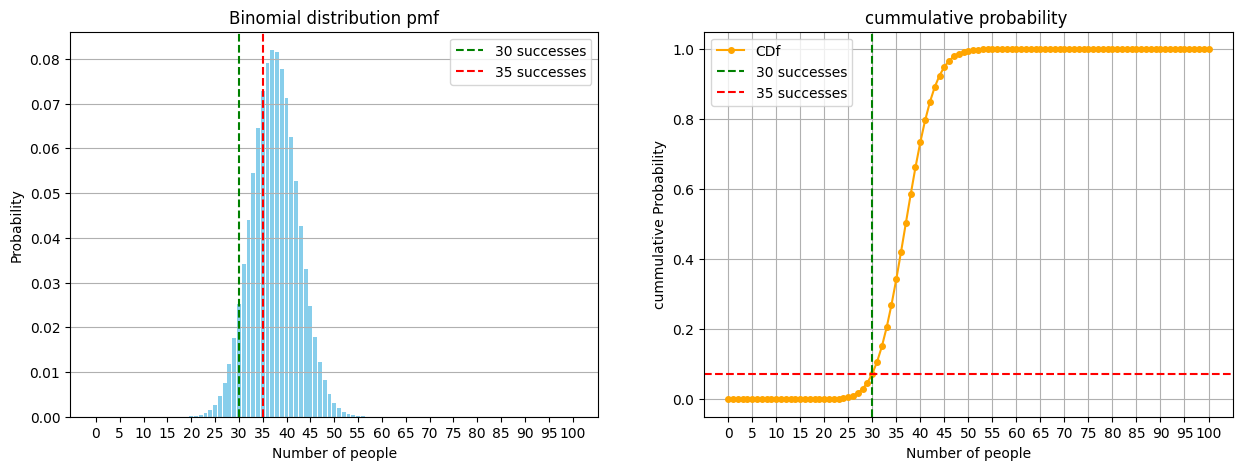

In [56]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)

x = np.arange(0,trials+1)
pmf = binom.pmf(x,trials,p)
cdf = binom.cdf(x,trials,p)

plt.bar(x,pmf,color='skyblue')
plt.title(f'Binomial distribution pmf')
plt.xlabel('Number of people')
plt.ylabel('Probability')
plt.xticks(np.arange(0,trials+1,5))
plt.axvline(x=30,linestyle='--',label='30 successes',color='green')
plt.axvline(x=35,linestyle='--',label='35 successes',color='red')
plt.grid(axis='y')
plt.legend()

plt.subplot(1,2,2)
plt.plot(x,cdf, marker='o', color = 'orange',label='CDf',markersize=4)
plt.title(f'cummulative probability ')
plt.xlabel('Number of people')
plt.ylabel('cummulative Probability')
plt.xticks(np.arange(0,trials+1,5))
plt.axvline(x=30,linestyle='--',label='30 successes',color='green')
plt.axhline(y=cummulative_prob,linestyle='--',label='35 successes',color='red')
plt.grid()
plt.legend()